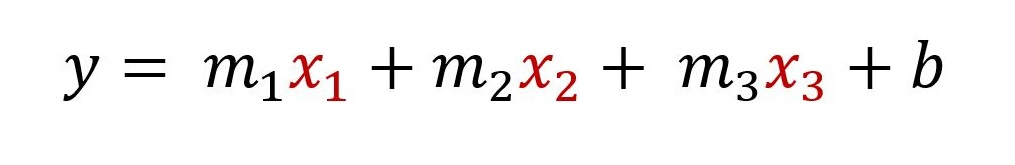

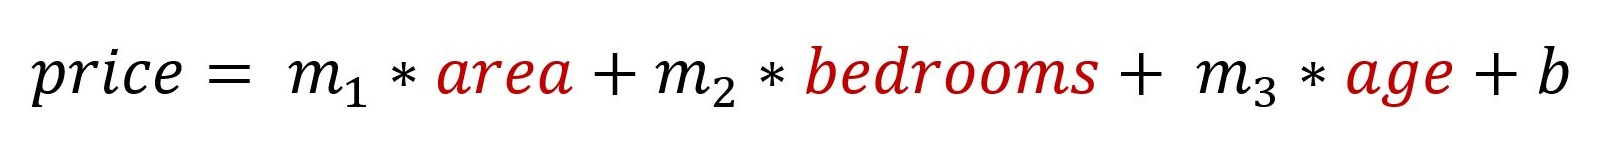

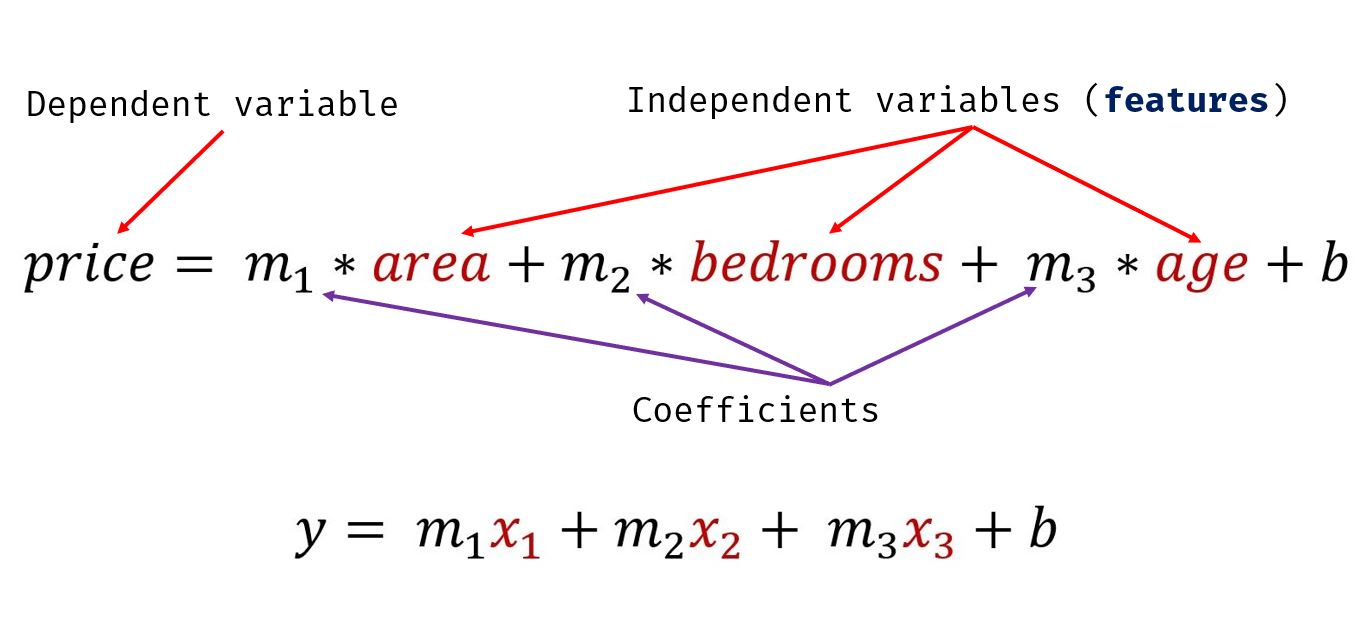

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model

In [14]:
df=pd.read_csv('homeprices_for_LR_MultipleVariables.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [9]:
df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [10]:
df.median()

area          3400.0
bedrooms         4.0
age             16.5
price       602500.0
dtype: float64

In [11]:
df.bedrooms.median()

4.0

In [16]:
df.fillna(df.bedrooms.median(),inplace = True)

In [17]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [19]:
df.bedrooms

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [20]:
df['bedrooms']

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [21]:
df[['area','bedrooms','age']]

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [23]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df['price'])

LinearRegression()

In [24]:
reg.predict([[3000,4,15]])

array([602590.07937407])

In [25]:
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [26]:
reg.predict([[3000,3,40]])

array([498408.25158031])

### Calculation :

In [28]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [29]:
reg.intercept_

221323.00186540408

### coef1 * area+coef2 * bedrooms+coef*age+intercept

In [30]:
112.06244194*3000+23388.88007794*3+-3231.71790863*40+221323.00186540408

498408.2515740241

In [31]:
reg.predict([[2500,4,5]])

array([578876.03748933])

### Exercise

In [6]:
from word2number import w2n

ModuleNotFoundError: No module named 'word2number'

In [5]:
d = pd.read_csv("hiring.csv")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [2]:
df=pd.read_csv('50_CompList.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import seaborn as sns

In [24]:
df=pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


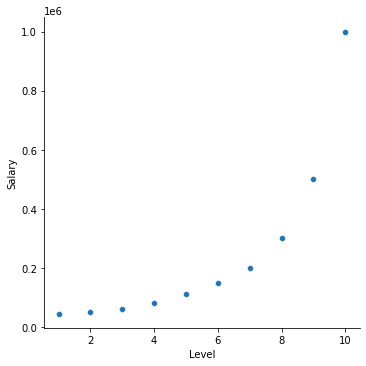

In [25]:
sns.relplot(x='Level',y='Salary',data=df)

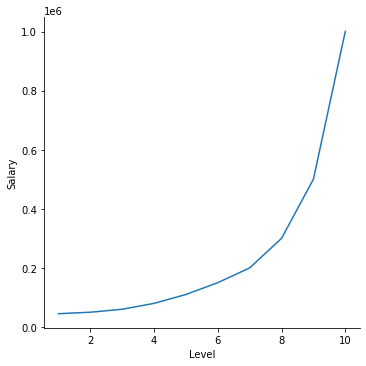

In [5]:
sns.relplot(x='Level',y='Salary',data=df,kind='line')


In [27]:
x=df['Level']
y=df['Salary']

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_reg=PolynomialFeatures(degree=6)
x_ploy=poly_reg.fit_transform(x)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1  2  3  4  5  6  7  8  9 10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [3]:
reg=linear_model.LinearRegression()
reg.fit(x_poly,y)

LinearRegression()

In [4]:
reg.predict([[11]])

array([694333.33333333])

In [6]:
reg.score(df[['Level']],df.Salary)

0.6690412331929895

In [20]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [21]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = ct.fit_transform(x)

ValueError: all features must be in [0, 1] or [-2, 0]

In [10]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = ct.fit_transform(x)

In [15]:
x

<10x11 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [12]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
reg.predict([[3000,4,15]])

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
df1=df

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Position', OneHotEncoder(), [0])], remainder = 'passthrough')

In [13]:
x = ct.fit_transform(x)
x

<10x11 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [14]:
print(x)

  (0, 0)	1.0
  (0, 10)	1.0
  (1, 4)	1.0
  (1, 10)	2.0
  (2, 8)	1.0
  (2, 10)	3.0
  (3, 5)	1.0
  (3, 10)	4.0
  (4, 3)	1.0
  (4, 10)	5.0
  (5, 7)	1.0
  (5, 10)	6.0
  (6, 6)	1.0
  (6, 10)	7.0
  (7, 9)	1.0
  (7, 10)	8.0
  (8, 1)	1.0
  (8, 10)	9.0
  (9, 2)	1.0
  (9, 10)	10.0


In [15]:
print(x[0:])

  (0, 0)	1.0
  (0, 10)	1.0
  (1, 4)	1.0
  (1, 10)	2.0
  (2, 8)	1.0
  (2, 10)	3.0
  (3, 5)	1.0
  (3, 10)	4.0
  (4, 3)	1.0
  (4, 10)	5.0
  (5, 7)	1.0
  (5, 10)	6.0
  (6, 6)	1.0
  (6, 10)	7.0
  (7, 9)	1.0
  (7, 10)	8.0
  (8, 1)	1.0
  (8, 10)	9.0
  (9, 2)	1.0
  (9, 10)	10.0


In [ ]:
from sklearn.preprocessing import OneHot